# Tesla Fatalities Exploration

In [25]:
#-- Importing Nessesary Liberaries --#
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
#-- Importing the Dataset --#
df = pd.read_csv("/Users/michaelsegaline/Desktop/Telsa Deaths/Tesla Deaths analysis.csv")

In [27]:
#-- Inspecting the dataset --#
df.head()

,Year,Date,Country,State,Description,Deaths
0,2022.0,1/30/23,USA,MO,Speeding Tesla crashes into car,1.0
1,2022.0,1/21/23,USA,CA,Tesla crashses into resident's pool,1.0
2,2022.0,1/17/23,USA,CA,Tesla crashes into back of semi,1.0
3,2022.0,1/7/23,Canada,-,Tesla crashes,1.0
4,2022.0,1/7/23,USA,WA,"Tesla hits pole, catches on fire",1.0


In [28]:
#-- 309 original rows --#
df.shape

(309, 6)

# Cleaning the Data

In [29]:
#-- Dropping all empty rows --#
df = df.dropna()

In [30]:
#-- No, Missing Values --#
#-- The dataset was 4% sparse --#
df.shape

(296, 6)

In [31]:
#-- Removing White spaces in the Column titles --#

df.columns = df.columns.str.strip()

In [32]:
df.describe()

,Year,Deaths
count,296.000000,296.000000
mean,2020.047297,1.199324
std,2.074329,0.511693
min,2013.000000,1.000000
25%,2019.000000,1.000000
50%,2021.000000,1.000000
75%,2022.000000,1.000000
max,2022.000000,4.000000


In [33]:
df.Year.unique()

array([2022., 2020., 2021., 2019., 2018., 2017., 2016., 2015., 2014.,
       2013.])

In [34]:
#-- Code to clean up the year --#

df['Year'] = df['Year'].astype(str).str[:-2]
df

,Year,Date,Country,State,Description,Deaths
0,2022,1/30/23,USA,MO,Speeding Tesla crashes into car,1.0
1,2022,1/21/23,USA,CA,Tesla crashses into resident's pool,1.0
2,2022,1/17/23,USA,CA,Tesla crashes into back of semi,1.0
3,2022,1/7/23,Canada,-,Tesla crashes,1.0
4,2022,1/7/23,USA,WA,"Tesla hits pole, catches on fire",1.0
...,...,...,...,...,...,...
291,2014,7/14/14,USA,CA,Tesla kills motorcyclist,1.0
292,2014,7/4/14,USA,CA,Thief crashes stolen Tesla,1.0
293,2014,7/4/14,USA,CA,Tesla rear ends stopped car,3.0
294,2013,11/2/13,USA,CA,Tesla kills cyclist,1.0


In [35]:
df.head()

,Year,Date,Country,State,Description,Deaths
0,2022,1/30/23,USA,MO,Speeding Tesla crashes into car,1.0
1,2022,1/21/23,USA,CA,Tesla crashses into resident's pool,1.0
2,2022,1/17/23,USA,CA,Tesla crashes into back of semi,1.0
3,2022,1/7/23,Canada,-,Tesla crashes,1.0
4,2022,1/7/23,USA,WA,"Tesla hits pole, catches on fire",1.0


<function matplotlib.pyplot.show(close=None, block=None)>

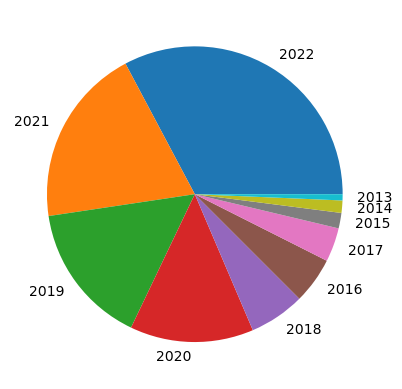

In [36]:
year = df.Year.value_counts()
plt.pie(year,labels=year.index,)

plt.show

In [37]:
df['Deaths'].count()

296

/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Deaths', ylabel='Density'>

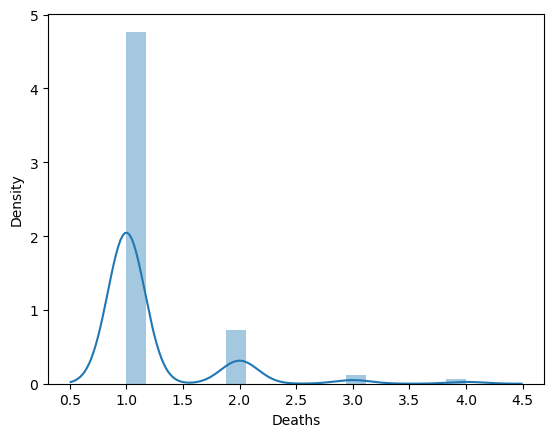

In [38]:
dead = df.Deaths
sns.distplot(dead)

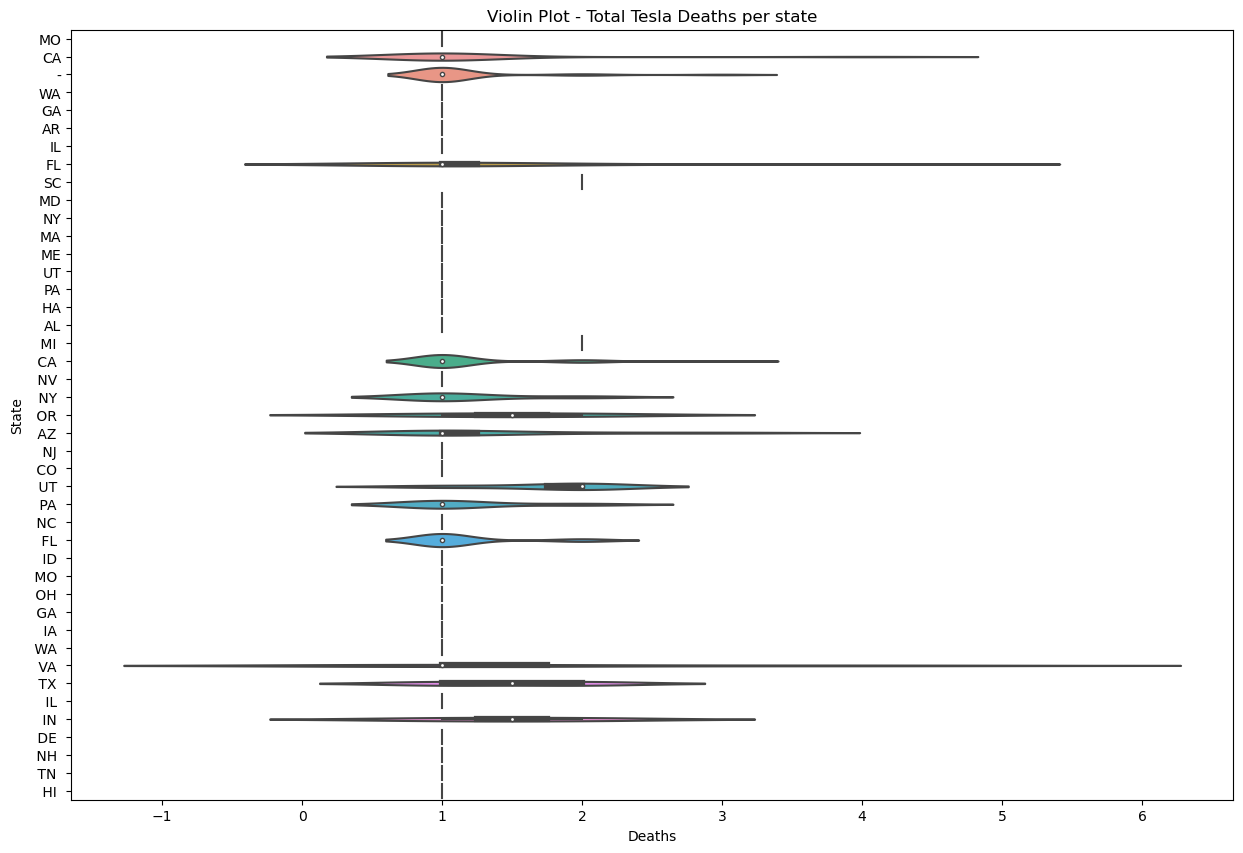

In [39]:

plt.figure(figsize=(15, 10))
sns.violinplot(x='Deaths', y='State', data=df)
plt.title('Violin Plot - Total Tesla Deaths per state')
plt.show()

In [40]:
#-- Crashes where recorded in 43 different states --#

df.State.nunique()

43

In [41]:
df.Country.nunique()

23

Text(0, 0.5, 'Country')

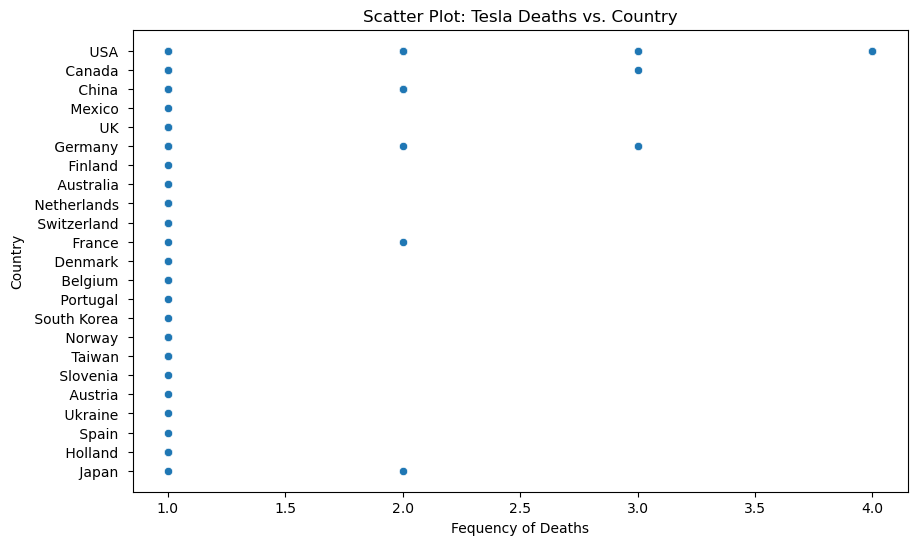

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="Deaths", y="Country", data=df, ax=ax)

# Add titles and labels if needed
ax.set_title("Scatter Plot: Tesla Deaths vs. Country")
ax.set_xlabel("Fequency of Deaths")
ax.set_ylabel("Country")


# Exploring Fatality Descriptions 

In [43]:
#-- Importing Nesseary liberaries --#
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import warnings
from collections import Counter
import datetime
import wordcloud
from wordcloud import WordCloud


# Generating a WordCloud frequency count of words in crash 'description' column

In [44]:
# Filter the dataframe to only include category_id 20
word_count = df.Description 

# Combine all the video titles into one string
all_titles = ' '.join(df['Description'])

# Tokenize the string
tokens = word_tokenize(all_titles.lower())

# Filter out stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token not in stop_words]

# Count the frequency of each word
word_freq = Counter(filtered_tokens)

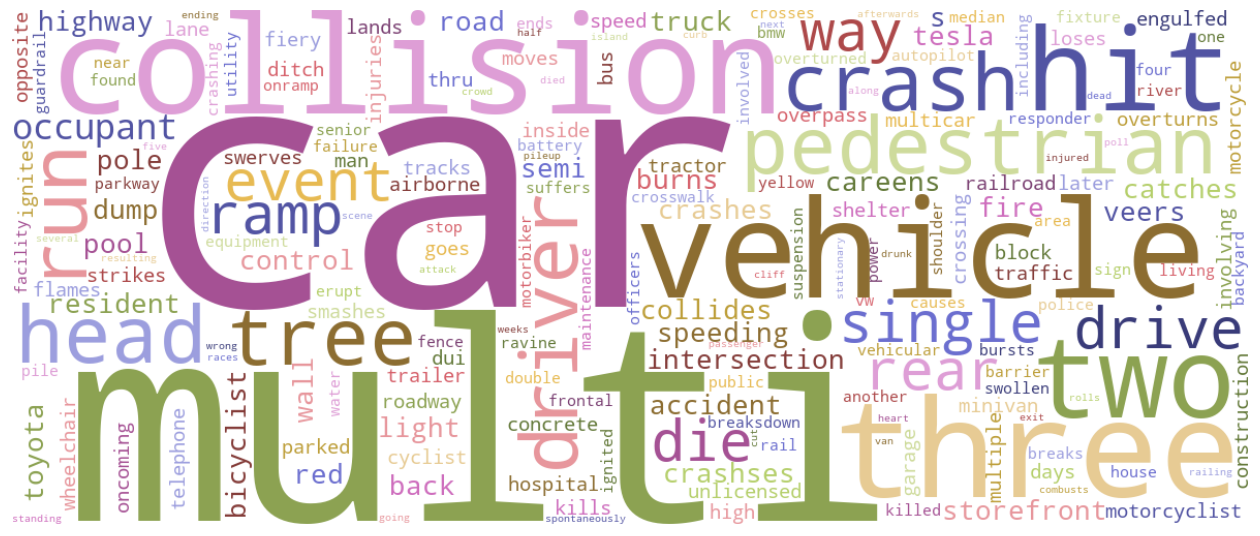

In [45]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(word_freq))
plt.figure(figsize=(16,11))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

# Finding the number of fatalities involving a vehical 'fire'

In [46]:
# List of words to search for
word_to_search = ["fire"]

# Use boolean indexing to filter rows containing the specified words
filtered_rows = df[df['Description'].str.contains('|'.join(word_to_search), case=False, na=False)]

# Count the number of rows that contain the specified words
count_of_rows = len(filtered_rows)

# Print the count
print("Number of rows containing  'fire'", count_of_rows)

Number of rows containing  'fire' 19


# Now Searching for Synonyms

In [47]:
# List of words to search for
words_to_search = ["bursts","ignites", "combust", "flames", "burns"]

# Use boolean indexing to filter rows containing the specified words
filtered_rows = df[df['Description'].str.contains('|'.join(words_to_search), case=False, na=False)]

# Count the number of rows that contain the specified words
count_of_rows = len(filtered_rows)

# Print the count
print("Number of rows containing 'ignite','flames','combust', or 'burns':", count_of_rows)

Number of rows containing 'ignite','flames','combust', or 'burns': 24


In [48]:
# List of words to search for
words_to_search = ["bursts","ignites", "fire", "combust", "flames", "burns"]

# Use boolean indexing to filter rows containing the specified words
filtered_rows = df[df['Description'].str.contains('|'.join(words_to_search), case=False, na=False)]

# Count the number of rows that contain the specified words
count_of_rows = len(filtered_rows)

# Print the count
print("Number of rows containing 'ignite', 'fire','flames','combust', or 'burns':", count_of_rows)

Number of rows containing 'ignite', 'fire','flames','combust', or 'burns': 41


# 41 Fatalities involved vehical fire  

41 / 296 = 0.138

# 13.8% chance a Tesla Fatality will involve fire. 